In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPool2D
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [18]:
#Set viewing options
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

In [19]:
trainlabel = pd.read_csv('train_10pct_labels.csv')

In [20]:
train = pd.read_csv('train_10pct.csv')

In [21]:
trainlabel.shape

(26059, 2)

In [22]:
train.shape

(26059, 39)

In [23]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [24]:
train.isna().sum()


building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [25]:
#null model
trainlabel['damage_grade'].value_counts(normalize=True)

2    0.567405
3    0.336122
1    0.096473
Name: damage_grade, dtype: float64

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26059 entries, 0 to 26058
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             26059 non-null  int64 
 1   geo_level_1_id                          26059 non-null  int64 
 2   geo_level_2_id                          26059 non-null  int64 
 3   geo_level_3_id                          26059 non-null  int64 
 4   count_floors_pre_eq                     26059 non-null  int64 
 5   age                                     26059 non-null  int64 
 6   area_percentage                         26059 non-null  int64 
 7   height_percentage                       26059 non-null  int64 
 8   land_surface_condition                  26059 non-null  object
 9   foundation_type                         26059 non-null  object
 10  roof_type                               26059 non-null  object
 11  gr

In [44]:
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [26]:
##https://intellipaat.com/community/1161/label-encoding-across-multiple-columns-in-scikit-learn
le = LabelEncoder()
train_enc = train.apply(le.fit_transform)
train_enc

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,19838,6,435,7525,1,6,5,3,2,2,0,0,1,3,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,678,8,802,1716,1,2,7,5,1,2,0,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
2,2319,21,322,5535,1,2,4,3,2,2,0,0,3,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
3,14549,22,370,6597,1,2,5,3,2,2,0,0,3,2,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
4,5001,11,115,928,2,6,7,7,2,2,0,0,3,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26054,11229,20,169,1422,0,3,4,2,2,2,0,0,0,2,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
26055,347,20,1047,894,1,2,7,3,2,2,1,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
26056,5972,10,1268,7344,2,13,5,5,2,2,0,0,1,2,2,1,1,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
26057,24218,17,208,6169,2,5,7,5,2,2,1,0,1,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0


In [27]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26059 entries, 0 to 26058
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   building_id                             26059 non-null  int64
 1   geo_level_1_id                          26059 non-null  int64
 2   geo_level_2_id                          26059 non-null  int64
 3   geo_level_3_id                          26059 non-null  int64
 4   count_floors_pre_eq                     26059 non-null  int64
 5   age                                     26059 non-null  int64
 6   area_percentage                         26059 non-null  int64
 7   height_percentage                       26059 non-null  int64
 8   land_surface_condition                  26059 non-null  int32
 9   foundation_type                         26059 non-null  int32
 10  roof_type                               26059 non-null  int32
 11  ground_floor_ty

In [39]:
trainlabel.shape


(26059, 2)

In [56]:
train_merge = pd.concat([train_enc,trainlabel], axis=1)

In [57]:
train_merge.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id,damage_grade
26054,11229,20,169,1422,0,3,4,2,2,2,0,0,0,2,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,455474,2
26055,347,20,1047,894,1,2,7,3,2,2,1,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,15224,2
26056,5972,10,1268,7344,2,13,5,5,2,2,0,0,1,2,2,1,1,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,239671,3
26057,24218,17,208,6169,2,5,7,5,2,2,1,0,1,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,977262,3
26058,22448,21,41,3624,1,2,7,3,2,2,0,0,1,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,906011,2


In [58]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26059 entries, 0 to 26058
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   building_id                             26059 non-null  int64
 1   geo_level_1_id                          26059 non-null  int64
 2   geo_level_2_id                          26059 non-null  int64
 3   geo_level_3_id                          26059 non-null  int64
 4   count_floors_pre_eq                     26059 non-null  int64
 5   age                                     26059 non-null  int64
 6   area_percentage                         26059 non-null  int64
 7   height_percentage                       26059 non-null  int64
 8   land_surface_condition                  26059 non-null  int32
 9   foundation_type                         26059 non-null  int32
 10  roof_type                               26059 non-null  int32
 11  ground_floor_ty

In [59]:
X = train_merge.drop(['damage_grade'], axis=1)
y = train_merge['damage_grade']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=123)

In [78]:
y_train.shape

(19544, 4)

In [79]:
y_test.shape

(6515, 4)

In [66]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [92]:
early = EarlyStopping(patience=5)


In [97]:
model = Sequential()
model.add(Dense(80, activation='relu', kernel_regularizer=l2(.1)))
model.add(Dense(40, activation='relu'))
model.add(Dense(4, activation='softmax'))
          
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [98]:
history=model.fit(X_train, y_train,
                 validation_data=(X_test,y_test),
                 epochs=50, callbacks=[early])
# val_acc: 0.5675

Epoch 1/50
611/611 [==============================] - 2s 2ms/step - loss: 1174.6455 - acc: 0.4358 - val_loss: 171.4380 - val_acc: 0.5652
Epoch 2/50
611/611 [==============================] - 1s 1ms/step - loss: 503.9607 - acc: 0.4450 - val_loss: 823.7909 - val_acc: 0.5661
Epoch 3/50
611/611 [==============================] - 1s 1ms/step - loss: 466.5680 - acc: 0.4502 - val_loss: 135.8128 - val_acc: 0.3478
Epoch 4/50
611/611 [==============================] - 1s 1ms/step - loss: 316.1174 - acc: 0.4442 - val_loss: 287.5353 - val_acc: 0.5632
Epoch 5/50
611/611 [==============================] - 1s 1ms/step - loss: 227.6603 - acc: 0.4489 - val_loss: 196.7938 - val_acc: 0.5649
Epoch 6/50
611/611 [==============================] - 1s 1ms/step - loss: 177.6255 - acc: 0.4493 - val_loss: 165.2705 - val_acc: 0.1022
Epoch 7/50
611/611 [==============================] - 1s 1ms/step - loss: 209.3029 - acc: 0.4355 - val_loss: 196.9320 - val_acc: 0.3360
Epoch 8/50
611/611 [===========================

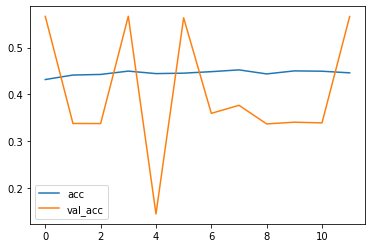

In [91]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend();

In [103]:
model2 = Sequential()
model2.add(Dense(12, activation='relu', kernel_regularizer=l2(.1)))
model2.add(Dropout(.3))
model2.add(Dense(80, activation='relu', kernel_regularizer=l2(.1)))
model2.add(Dropout(.3))
model2.add(Dense(30, activation='relu'))
model2.add(Dense(4, activation='softmax'))
          
model2.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')
# still just vaL_acc:56.75

In [104]:
history2=model2.fit(X_train, y_train,
                 validation_data=(X_test,y_test),
                 epochs=50, callbacks=[early])

Epoch 1/50
611/611 [==============================] - 2s 2ms/step - loss: 9781.7953 - acc: 0.4339 - val_loss: 784.8812 - val_acc: 0.5675
Epoch 2/50
611/611 [==============================] - 1s 1ms/step - loss: 504.9175 - acc: 0.4454 - val_loss: 107.4991 - val_acc: 0.5668
Epoch 3/50
611/611 [==============================] - 1s 1ms/step - loss: 107.5756 - acc: 0.4454 - val_loss: 11.9009 - val_acc: 0.5642
Epoch 4/50
611/611 [==============================] - 1s 1ms/step - loss: 18.6915 - acc: 0.4370 - val_loss: 1.3295 - val_acc: 0.5675
Epoch 5/50
611/611 [==============================] - 1s 1ms/step - loss: 1.3025 - acc: 0.5676 - val_loss: 1.2456 - val_acc: 0.5673
Epoch 6/50
611/611 [==============================] - 1s 1ms/step - loss: 1.2496 - acc: 0.5739 - val_loss: 1.2198 - val_acc: 0.5673
Epoch 7/50
611/611 [==============================] - 1s 1ms/step - loss: 1.2139 - acc: 0.5698 - val_loss: 1.1873 - val_acc: 0.5668
Epoch 8/50
611/611 [==============================] - 1s 1ms/st

In [105]:
model2 = Sequential()
model2.add(Dense(12, activation='relu', kernel_regularizer=l2(.1)))
model2.add(Dropout(.3))
model2.add(Dense(80, activation='relu', kernel_regularizer=l2(.1)))
model2.add(Dropout(.3))
model2.add(Dense(30, activation='relu'))
model2.add(Dense(4, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [106]:
history2=model2.fit(X_train, y_train,
                 validation_data=(X_test,y_test),
                 epochs=50, callbacks=[early])

Epoch 1/50
611/611 [==============================] - 2s 2ms/step - loss: 10347.2174 - acc: 0.4215 - val_loss: 130.2572 - val_acc: 0.3659
Epoch 2/50
611/611 [==============================] - 1s 1ms/step - loss: 229.7110 - acc: 0.4399 - val_loss: 1.8631 - val_acc: 0.5658
Epoch 3/50
611/611 [==============================] - 1s 1ms/step - loss: 28.8955 - acc: 0.5331 - val_loss: 1.7453 - val_acc: 0.5667
Epoch 4/50
611/611 [==============================] - 1s 1ms/step - loss: 2.4404 - acc: 0.5571 - val_loss: 1.6954 - val_acc: 0.5668
Epoch 5/50
611/611 [==============================] - 1s 1ms/step - loss: 1.7002 - acc: 0.5658 - val_loss: 1.6695 - val_acc: 0.5675
Epoch 6/50
611/611 [==============================] - 1s 1ms/step - loss: 1.6756 - acc: 0.5674 - val_loss: 1.6537 - val_acc: 0.5675
Epoch 7/50
611/611 [==============================] - 1s 1ms/step - loss: 1.6610 - acc: 0.5666 - val_loss: 1.6411 - val_acc: 0.5675
Epoch 8/50
611/611 [==============================] - 1s 1ms/step -